<a href="https://colab.research.google.com/github/Becksayuk/AllBet-Game/blob/main/Brain_tumor_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!unzip /content/BrainTumorDataset.zip

Archive:  /content/BrainTumorDataset.zip
  inflating: brain_tumor_dataset/Tumor/Y1.jpg  
  inflating: brain_tumor_dataset/Tumor/Y10.jpg  
  inflating: brain_tumor_dataset/Tumor/Y100.JPG  
  inflating: brain_tumor_dataset/Tumor/Y101.jpg  
  inflating: brain_tumor_dataset/Tumor/Y102.jpg  
  inflating: brain_tumor_dataset/Tumor/Y103.jpg  
  inflating: brain_tumor_dataset/Tumor/Y104.jpg  
  inflating: brain_tumor_dataset/Tumor/Y105.jpg  
  inflating: brain_tumor_dataset/Tumor/Y106.jpg  
  inflating: brain_tumor_dataset/Tumor/Y107.jpg  
  inflating: brain_tumor_dataset/Tumor/Y108.jpg  
  inflating: brain_tumor_dataset/Tumor/Y109.JPG  
  inflating: brain_tumor_dataset/Tumor/Y11.jpg  
  inflating: brain_tumor_dataset/Tumor/Y111.JPG  
  inflating: brain_tumor_dataset/Tumor/Y112.JPG  
  inflating: brain_tumor_dataset/Tumor/Y113.JPG  
  inflating: brain_tumor_dataset/Tumor/Y114.JPG  
  inflating: brain_tumor_dataset/Tumor/Y115.JPG  
  inflating: brain_tumor_dataset/Tumor/Y116.JPG  
  inflating: 

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [6]:
#count the number of images in the respective classes 1-Tumor, 0-Healthy
ROOT_DIR = "/content/brain_tumor_dataset"
number_of_images = {}
for dir in os.listdir(ROOT_DIR):
  number_of_images[dir] = len(os.listdir(os.path.join(ROOT_DIR, dir)))

In [13]:
number_of_images.items()

dict_items([('healthy', 98), ('Tumor', 155)])

In [7]:

# split dataset 70%-Training, 15%-Testing, 15%- Validation
#We create a train folder

def dataFolder(p, split):

  if not os.path.exists("./"+p):
    os.mkdir("./"+p)

    for dir in os.listdir(ROOT_DIR):
      os.makedirs(os.path.join("./"+p+"/"+dir))

      for img in np.random.choice(a = os.listdir(os.path.join(ROOT_DIR, dir)),
                                size = (math.floor(split*number_of_images[dir])-2), replace = False):


        O = os.path.join(ROOT_DIR, dir, img)
        D = os.path.join("./"+p, dir)
        shutil.copy(O,D)
        os.remove(O)
  else:
    print( p + "folder already exists")


dataFolder("train", 0.7)


In [8]:
dataFolder("val", 0.15)

In [9]:
dataFolder("test", 0.15)

Model Build

In [10]:
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization, GlobalAvgPool2D
from keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras


In [11]:
# CNN MODEL

model = Sequential()
model.add(Conv2D(filters= 16, kernel_size = (3,3), activation= 'relu' ,input_shape = (224,224,3) ))

model.add(Conv2D(filters= 36, kernel_size = (3,3 ), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 64, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters= 128, kernel_size = (3,3), activation= 'relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Dropout(rate = 0.25))

model.add(Flatten())
model.add(Dense(units=64, activation= 'relu'))
model.add(Dropout(rate = 0.25))
model.add(Dense(units=1, activation= 'sigmoid'))

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 36)   │         5,220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 36)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 64)   │        20,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     5,537,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model.compile(optimizer= 'adam', loss= keras.losses.binary_crossentropy, metrics= ['accuracy'])

In [13]:
#Preparing our data using data generator

def preprocessingImages(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(zoom_range=0.2, shear_range=0.2, rescale=1/255, horizontal_flip=True)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [14]:
path = "/content/train"
train_data = preprocessingImages(path)


Found 172 images belonging to 2 classes.


In [15]:
train_data.class_indices


{'Tumor': 0, 'healthy': 1}

In [16]:

def preprocessingImages2(path):
    """
    input : path
    output : preprocessed images
    """

    image_data = ImageDataGenerator(rescale=1/255)
    image = image_data.flow_from_directory(directory=path, target_size=(224,224), batch_size=32, class_mode='binary')

    return image

In [17]:
path = "/content/test"
test_data = preprocessingImages2(path)

Found 33 images belonging to 2 classes.


In [18]:
path = "/content/val"
val_data = preprocessingImages2(path)

Found 33 images belonging to 2 classes.


In [19]:
# Early Stopping and model check point

from keras.callbacks import ModelCheckpoint, EarlyStopping

# early stopping

es = EarlyStopping(monitor="val_accuracy", min_delta=0.01, patience=5, verbose=1)

#modal checkpoint
mc =  ModelCheckpoint(monitor = "val_accuracy", filepath="./bestmodel.h5", verbose=1, save_best_only= True, mode = "auto")

cd = [es, mc]

In [31]:
# Model Training

hs = model.fit(train_data, steps_per_epoch = 8, epochs= 30, verbose = 1, validation_data= val_data, validation_steps= 16, callbacks= cd)

Epoch 1/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 357ms/step - accuracy: 0.7962 - loss: 0.5476
Epoch 1: val_accuracy improved from -inf to 0.69697, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 315ms/step - accuracy: 0.7919 - loss: 0.5497 - val_accuracy: 0.6970 - val_loss: 0.5693
Epoch 2/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step - accuracy: 0.7920 - loss: 0.5002
Epoch 2: val_accuracy did not improve from 0.69697
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 312ms/step - accuracy: 0.7902 - loss: 0.5143 - val_accuracy: 0.6970 - val_loss: 0.6202
Epoch 3/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8216 - loss: 0.5039
Epoch 3: val_accuracy did not improve from 0.69697
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 333ms/step - accuracy: 0.8139 - loss: 0.5049 - val_accuracy: 0.6970 - val_loss: 0.6038
Epoch 4/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step - accuracy: 0.7951 - loss: 0.5080
Epoch 4: val_accuracy did not improve from 0.69697
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 319ms/step - accuracy: 0.7925 - loss: 0.5106 - val_accuracy: 0.6970 - val_loss: 0.5982
Epoch 5/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step - accuracy: 0.8522 - loss: 0.4195
Epoch 5: val_accuracy improved from 0.69697 to 0.72

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 332ms/step - accuracy: 0.8325 - loss: 0.4491 - val_accuracy: 0.7273 - val_loss: 0.5597
Epoch 6/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 361ms/step - accuracy: 0.7959 - loss: 0.4998
Epoch 6: val_accuracy did not improve from 0.72727
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 278ms/step - accuracy: 0.7961 - loss: 0.4981 - val_accuracy: 0.6667 - val_loss: 0.5885
Epoch 7/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.8036 - loss: 0.4755
Epoch 7: val_accuracy improved from 0.72727 to 0.75758, saving model to ./bestmodel.h5


8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 289ms/step - accuracy: 0.8062 - loss: 0.4669 - val_accuracy: 0.7576 - val_loss: 0.6698
Epoch 8/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 1s 588ms/step - accuracy: 0.8027 - loss: 0.4766
Epoch 8: val_accuracy did not improve from 0.75758
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 467ms/step - accuracy: 0.8128 - loss: 0.4555 - val_accuracy: 0.7576 - val_loss: 0.6128
Epoch 9/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 360ms/step - accuracy: 0.7839 - loss: 0.4212
Epoch 9: val_accuracy did not improve from 0.75758
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 275ms/step - accuracy: 0.7856 - loss: 0.4178 - val_accuracy: 0.6970 - val_loss: 0.5314
Epoch 10/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step - accuracy: 0.8610 - loss: 0.3809
Epoch 10: val_accuracy did not improve from 0.75758
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 312ms/step - accuracy: 0.8580 - loss: 0.3796 - val_accuracy: 0.7576 - val_loss: 0.5783
Epoch 11/30
6/8 ━━━━━━━━━━━━━━━━━━━━ 0s 356ms/step - accuracy: 0.8772 - loss: 0.3789
Epoch 11: val_accuracy did not improve from 0.75

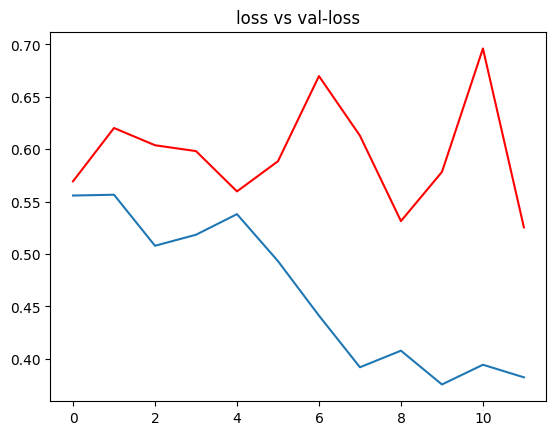

In [37]:
# Model Graphical Interpretation

h = hs.history
h.keys()

import matplotlib.pyplot as plt
plt.plot(h['loss'])
plt.plot(h['val_loss'], c = "red")
plt.title("loss vs val-loss")
plt.show()

In [51]:
# Model Accuracy

from keras.models import load_model
model = load_model("/content/bestmodel.h5")
acc = model.evaluate(test_data)[1]
print(f"Our model accuracy is {acc*100} %")

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 265ms/step - accuracy: 0.8163 - loss: 0.3264
Our model accuracy is 81.81818127632141 %


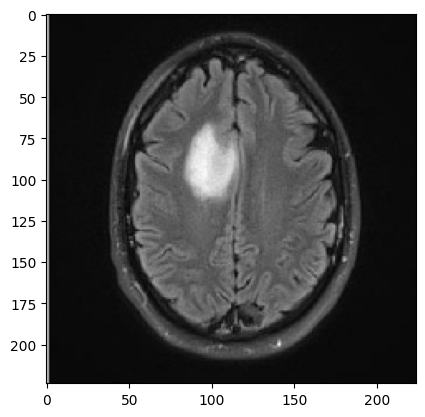

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
The person is healthy


In [75]:
from keras.preprocessing.image import load_img, img_to_array

path = "/content/brain_tumor_dataset/Tumor/Y8.jpg"
img = load_img(path, target_size=(224,224))
input_arr = img_to_array(img)
plt.imshow(input_arr/255.)
plt.show()
input_arr.shape

input_arr = np.expand_dims(input_arr, axis = 0)

pred = model.predict(input_arr)[0][0]
pred

if pred == 0:
  print("The person has a tumor")
else:
  print("The person is healthy")